# Transformada Discreta de Fourier - Análisis de Señales en Tiempo Real

La transformada discreta de Fourier permite realizar el análisis espectral de una señal. Nos lleva del espacio de tiempo discreto al espacio de frecuencias, donde podemos obtener información sobre las componentes frecuenciales predominantes de una señal. El desarrollo de este módulo tendrá el siguiente orden:

1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal
2. Identificación Frecucencia Predominante en Señal Discreta
3. Identificación de Notas Musicales con Audio Real
4. Analisis Espectral en Tiempo  Real Usando Entrada de Micrófono

In [1]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound

## 1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal

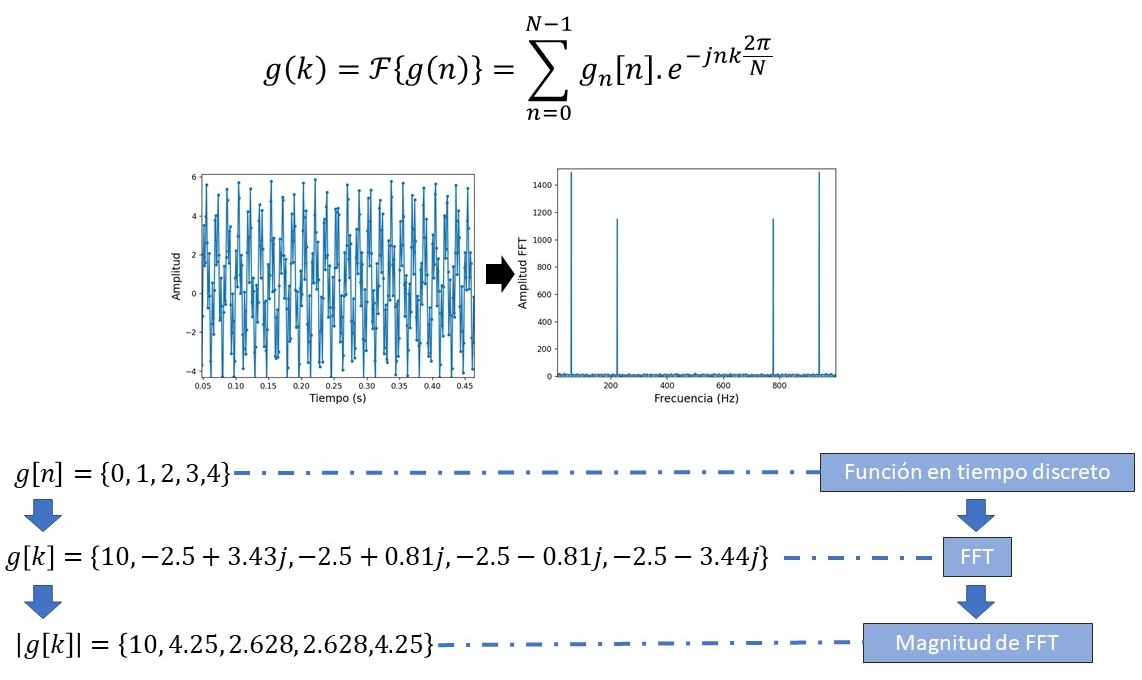

In [2]:
Image(filename='assets/FFT.jpg')

In [3]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

array([10. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [4]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [  -0.  126.  162. -162. -126.]


## 2. Identificación Frecucencia Predominante en Señal Discreta

Crearemos una señal compuesta por dos ondas sinusoidales de 60 Hz y 223 Hz. Agregaremos ruido a la señal compuesta y luego mediante la FFT identificaremos las frecuencias predominantes de la señal sintética

In [10]:
%matplotlib notebook

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


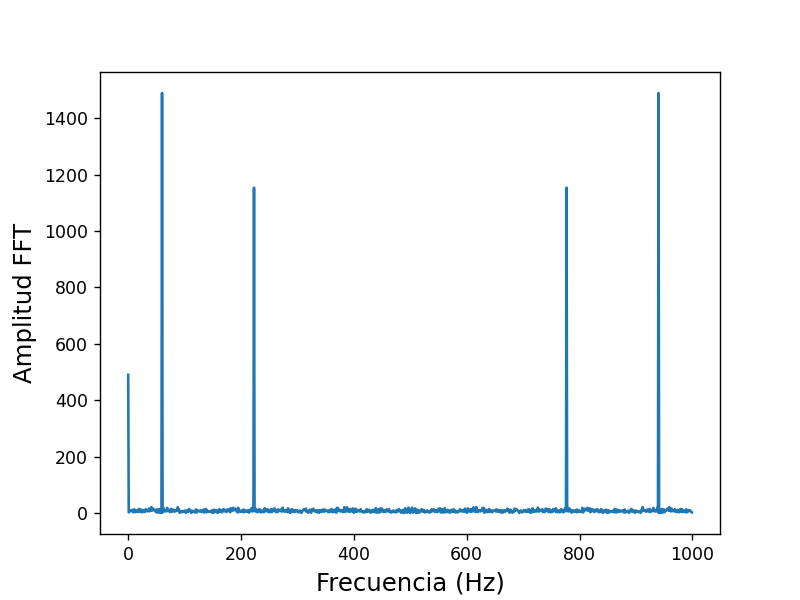

In [11]:
%matplotlib notebook

gk = fourier.fft(x)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(x))/len(x)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

## 3. Identificación de Notas Musicales con Audio Real

* Cargaremos una grabación de audio .wav (He grabado notas musicales de una guitarra RE, MI, SOL)
* Obtendremos la variación temporal de la señal de audio
* Encontraremos la frecuencia dominante y la compararemos con los rangos de frecuencias de las notas musicales


<IPython.core.display.Javascript object>


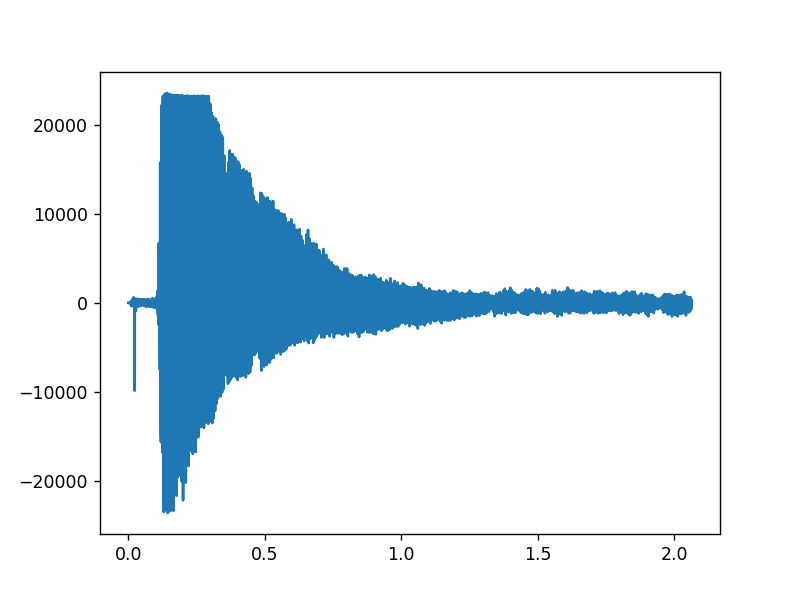

In [4]:
%matplotlib notebook

filename='7.data/rec_SOL.wav'                                
winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]              

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)
plt.show()

In [5]:
Audio_m.shape

(91008,)

<IPython.core.display.Javascript object>


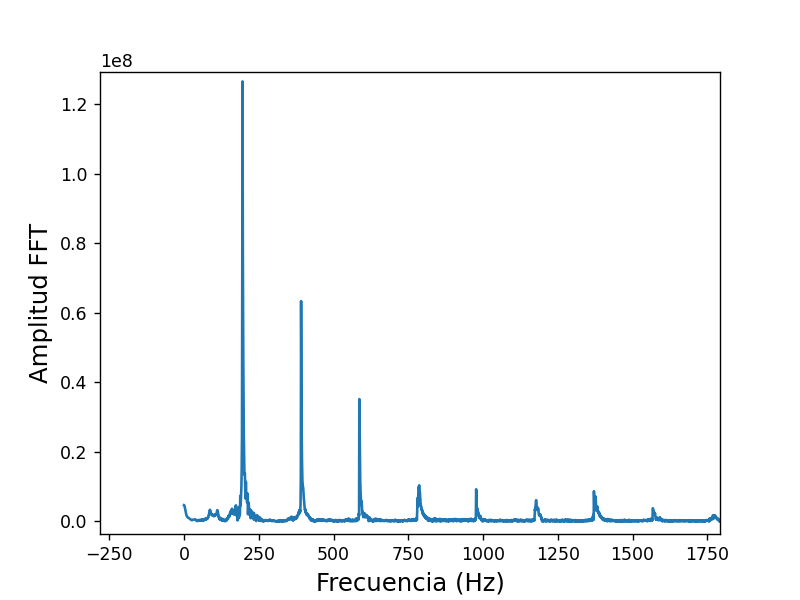

In [6]:
%matplotlib notebook

gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [7]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

La nota es SOL, con frecuencia:  [195.76740506]


## 4. Analisis Espectral en Tiempo Real Usando Entrada de Micrófono

* Instalaremos PyAudio para la adquicisión de audio en tiempo real
* Leemos la señal del micrófono en paquetes de tamaño especificado por el parámetro FRAMES y con frecuencia Fs
* Calculamos la FFT para cada paquete leido, mostramos la gráfica temporal y el espectro de la señal
* Calculamos la Frecuencia Dominante para cada paquete leido

In [9]:
!pip install PyAudio

In [8]:
import matplotlib
import pyaudio as pa 
import struct 

matplotlib.use('TkAgg')
#%matplotlib notebook

FRAMES = 1024*8                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 44100                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

## Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)

line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)

Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()


F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:
    
    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes
    
    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal
    
    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos

    
    ax1.set_ylim(0,np.max(M_gk+10)) 
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro 
    
    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    F_fund = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk
    
    print(int(F_fund))                                 # Imprimimos el valor de la frecuencia dominante

    fig.canvas.draw()
    fig.canvas.flush_events()

16408
958
75
96
96
96
96
96
576
269
247
322
193
193
1798
1841
339
635
242
457
322
328
1442
306
635
366
823
1442
414
215
635
640
656
1744
446
349
780
242
1243
96
96
306
301
139
145
301
301
193
559
193
209
220
296
414
236
231
231
387
166
387
371
403
366
403
376
274
376
371
376
199
371
979
376
387
220
387
392
522
376
382
236
382
392
414
215
538
166
301
269
145
1038
1927
2255
339
344
166
166
166
737
742
376
344
339
290
150
312
296
360
355
301
662
349
344
349
145
274
274
425
850
845
360
355
355
355
339
312
274
279
145
301
296
285
296
296
446
279
285
538
274
285
215
209
301
150
16171
1932
296
301
301
403
242
242
231
91
328
441
479
484
392
193
543
193
183
188
570
322
479
247
139
290
172
344
177
296
139
322
172
527
177
91
91
96
247
301
479
414
139
139
290
242
242
242
570
231
236
231
952
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
968
96

TclError: invalid command name "pyimage10"

# Taller

Realizar un sistema que identifique si la voz recibida por el microfono pertenece a un hombre o a una mujer, usando básicamente la comparación de frecuencias y bajo el supuesto de que la voz masculina es de menor frecuencia que la voz femenina